# Multillinearity

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load cars dataset.

In [2]:
Car_data = pd.read_csv("C:\\Users\\vishd\\Desktop\\docs\\autos_small.csv")
Car_data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\vishd\\Desktop\\docs\\autos_small.csv'

In [3]:
# 2. Figure out the best strategy to fill missing values
#Car_data.isnull().any()
#3. Complete any other preprocessing required.
# 4. Apply various regression models and find out which model is the best for this dataset
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Calculating basic statistics with the train data
train_stats = Car_data.describe()
train_stats = Car_data.transpose()
train_stats

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
price,400,3500,2200,4000,2600,2222,4000,570,9999,16999,...,3800,1899,2600,5190,5200,2650,9600,1500,970,7990
name,Ford_Escort,Bmw_320_cabrio,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,A3_Limousine,Smart_Smart_cabrio_450_cdi,BMW_318ti_compact,Toyota_Yaris_1.0_VVT_i,Audi_A4_B5_2_5TDi_Quattro_Chip_Gewindefahrwerk...,Golf_5_GTI_2.0L_TFSI,VW_Multivan_Comfortline,...,Ford_Galaxy,Vw_T2a_Westfalia_Karosse_Bj.70_rollbar_auf_Ach...,Ford_Fusion_1.25_Ambiente_2.Hand__Zahnriemen_&...,Volkswagen_Golf_1.9_TDI_Tour_Edition,Volkswagen_Golf_Plus_1.9_TDI,Opel_Corsa_C_1.2_Twinport,Volkswagen_Touran_2.0_TDI_DPF,Suche_zuverlaessigen_Kombi,Renault_Twingo,Renault_Megane_1.6_16V_100_Authentique
yearOfRegistration,1992,1996,1998,2006,2002,2001,2008,1999,2005,2006,...,2005,1970,2006,2007,2005,2005,2011,1999,2002,2012
monthOfRegistration,8,0,0,7,7,10,11,6,10,1,...,3,0,3,10,12,1,6,0,10,4
gearbox,manuell,manuell,manuell,manuell,automatik,manuell,manuell,manuell,manuell,manuell,...,manuell,NaN,manuell,manuell,manuell,manuell,manuell,NaN,manuell,manuell
powerPS,89,150,150,0,41,143,69,180,200,131,...,90,0,75,105,90,80,140,101,58,101
model,escort,3er,c_klasse,a3,fortwo,3er,yaris,a4,golf,transporter,...,galaxy,transporter,fusion,golf,golf,corsa,touran,astra,twingo,megane
kilometer,60000,125000,150000,150000,150000,150000,125000,150000,150000,150000,...,5000,150000,150000,150000,150000,150000,150000,150000,150000,60000
fuelType,benzin,NaN,benzin,diesel,diesel,benzin,benzin,diesel,benzin,diesel,...,NaN,benzin,benzin,diesel,diesel,benzin,diesel,NaN,benzin,benzin
brand,ford,bmw,mercedes_benz,audi,smart,bmw,toyota,audi,volkswagen,volkswagen,...,ford,volkswagen,ford,volkswagen,volkswagen,opel,volkswagen,opel,renault,renault


In [9]:
# Multiple Linear Regression with multiple catogorical values

In [10]:
#X = Car_data.iloc[:, :-1].values
#y = Car_data.iloc[:, -1].values
#X

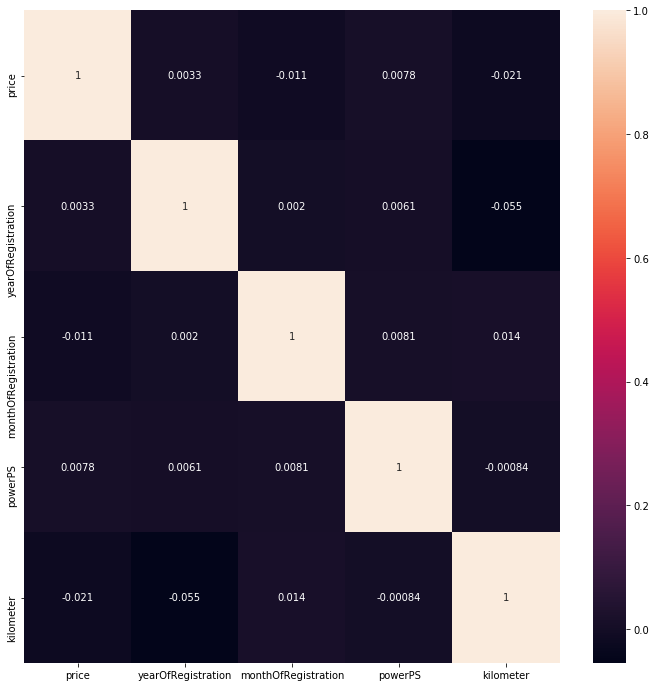

In [11]:
Car_data.drop(['name'], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize = (12,12))
ax = sns.heatmap(Car_data.corr(),annot = True)

In [12]:
Car_data.isnull().any()

price                  False
yearOfRegistration     False
monthOfRegistration    False
gearbox                 True
powerPS                False
model                   True
kilometer              False
fuelType                True
brand                  False
vehicleType             True
dtype: bool

In [13]:
cat_cols = ['gearbox', 'model', 'fuelType', 'vehicleType','brand']

Car_data_new = pd.get_dummies(Car_data, columns = cat_cols, drop_first=True)
Car_data_new.head()


,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer,gearbox_manuell,model_145,model_147,model_156,model_159,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,400,1992,8,89,60000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3500,1996,0,150,125000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2200,1998,0,150,150000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4000,2006,7,0,150000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2600,2002,7,41,150000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

X = Car_data_new.iloc[:, 1:].values
y = Car_data_new.iloc[:, 0].values

#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#fit the model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)


#predict the test set results
y_pred = mlr.predict(X_test)
y_pred = lr.predict(X_test)


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import IsolationForest
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(mlr.coef_)-1)*(1 - r2)
print(rmse, r2, adj_r2)
#mae = mean_absolute_error(y_test, yhat)
#print('MAE: %.3f' % mae)


#adj_r2_lr = 1 - float(len(y)-1)/(len(y)-len(lr.coef_)-1)*(1 - r2)
#print(rmse, r2, adj_r2_lr)

#mae = mean_absolute_error(y_test, yhat)
#print('MAE: %.3f' % mae)


# evaluate predictions
#mae = mean_absolute_error(y_test, yhat)
#print('MAE: %.3f' % mae)

21540498090.94036 -6258881909644.252 -6446493635613.224


# 5. Apply different Outlier detection methods and choose best approach to treat outliers 

In [16]:
# identify outliers by iforest

from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)


(8000, 291) (8000,)
(7200, 291) (7200,)
MAE: 65315112.277


In [17]:
#outlier detection by Minimum Covariance Determinant
from sklearn.covariance import EllipticEnvelope

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(7200, 291) (7200,)


C:\Users\vishd\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


(7128, 291) (7128,)
MAE: 65315112.277


In [18]:
#outlier detection by Local Outlier Factor

from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(7128, 291) (7128,)
(6770, 291) (6770,)
MAE: 65315112.277


In [19]:
# outlier detection by One-Class SVM

from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(6770, 291) (6770,)
(3426, 291) (3426,)
MAE: 2121767725.848


In [20]:
# Answer : In this case iforest outlier identification is best method for the outlier detection as it detects more outlier than the 
# other mothods.Although other methods has given the LOw MAE but the detected outliers are not as good as iforest method.

# for given data set iforest is the best outlier detection method. 

In [21]:
# 6. Apply Variance Inflation Factors calculation and find if the model built has collinearity between different variables

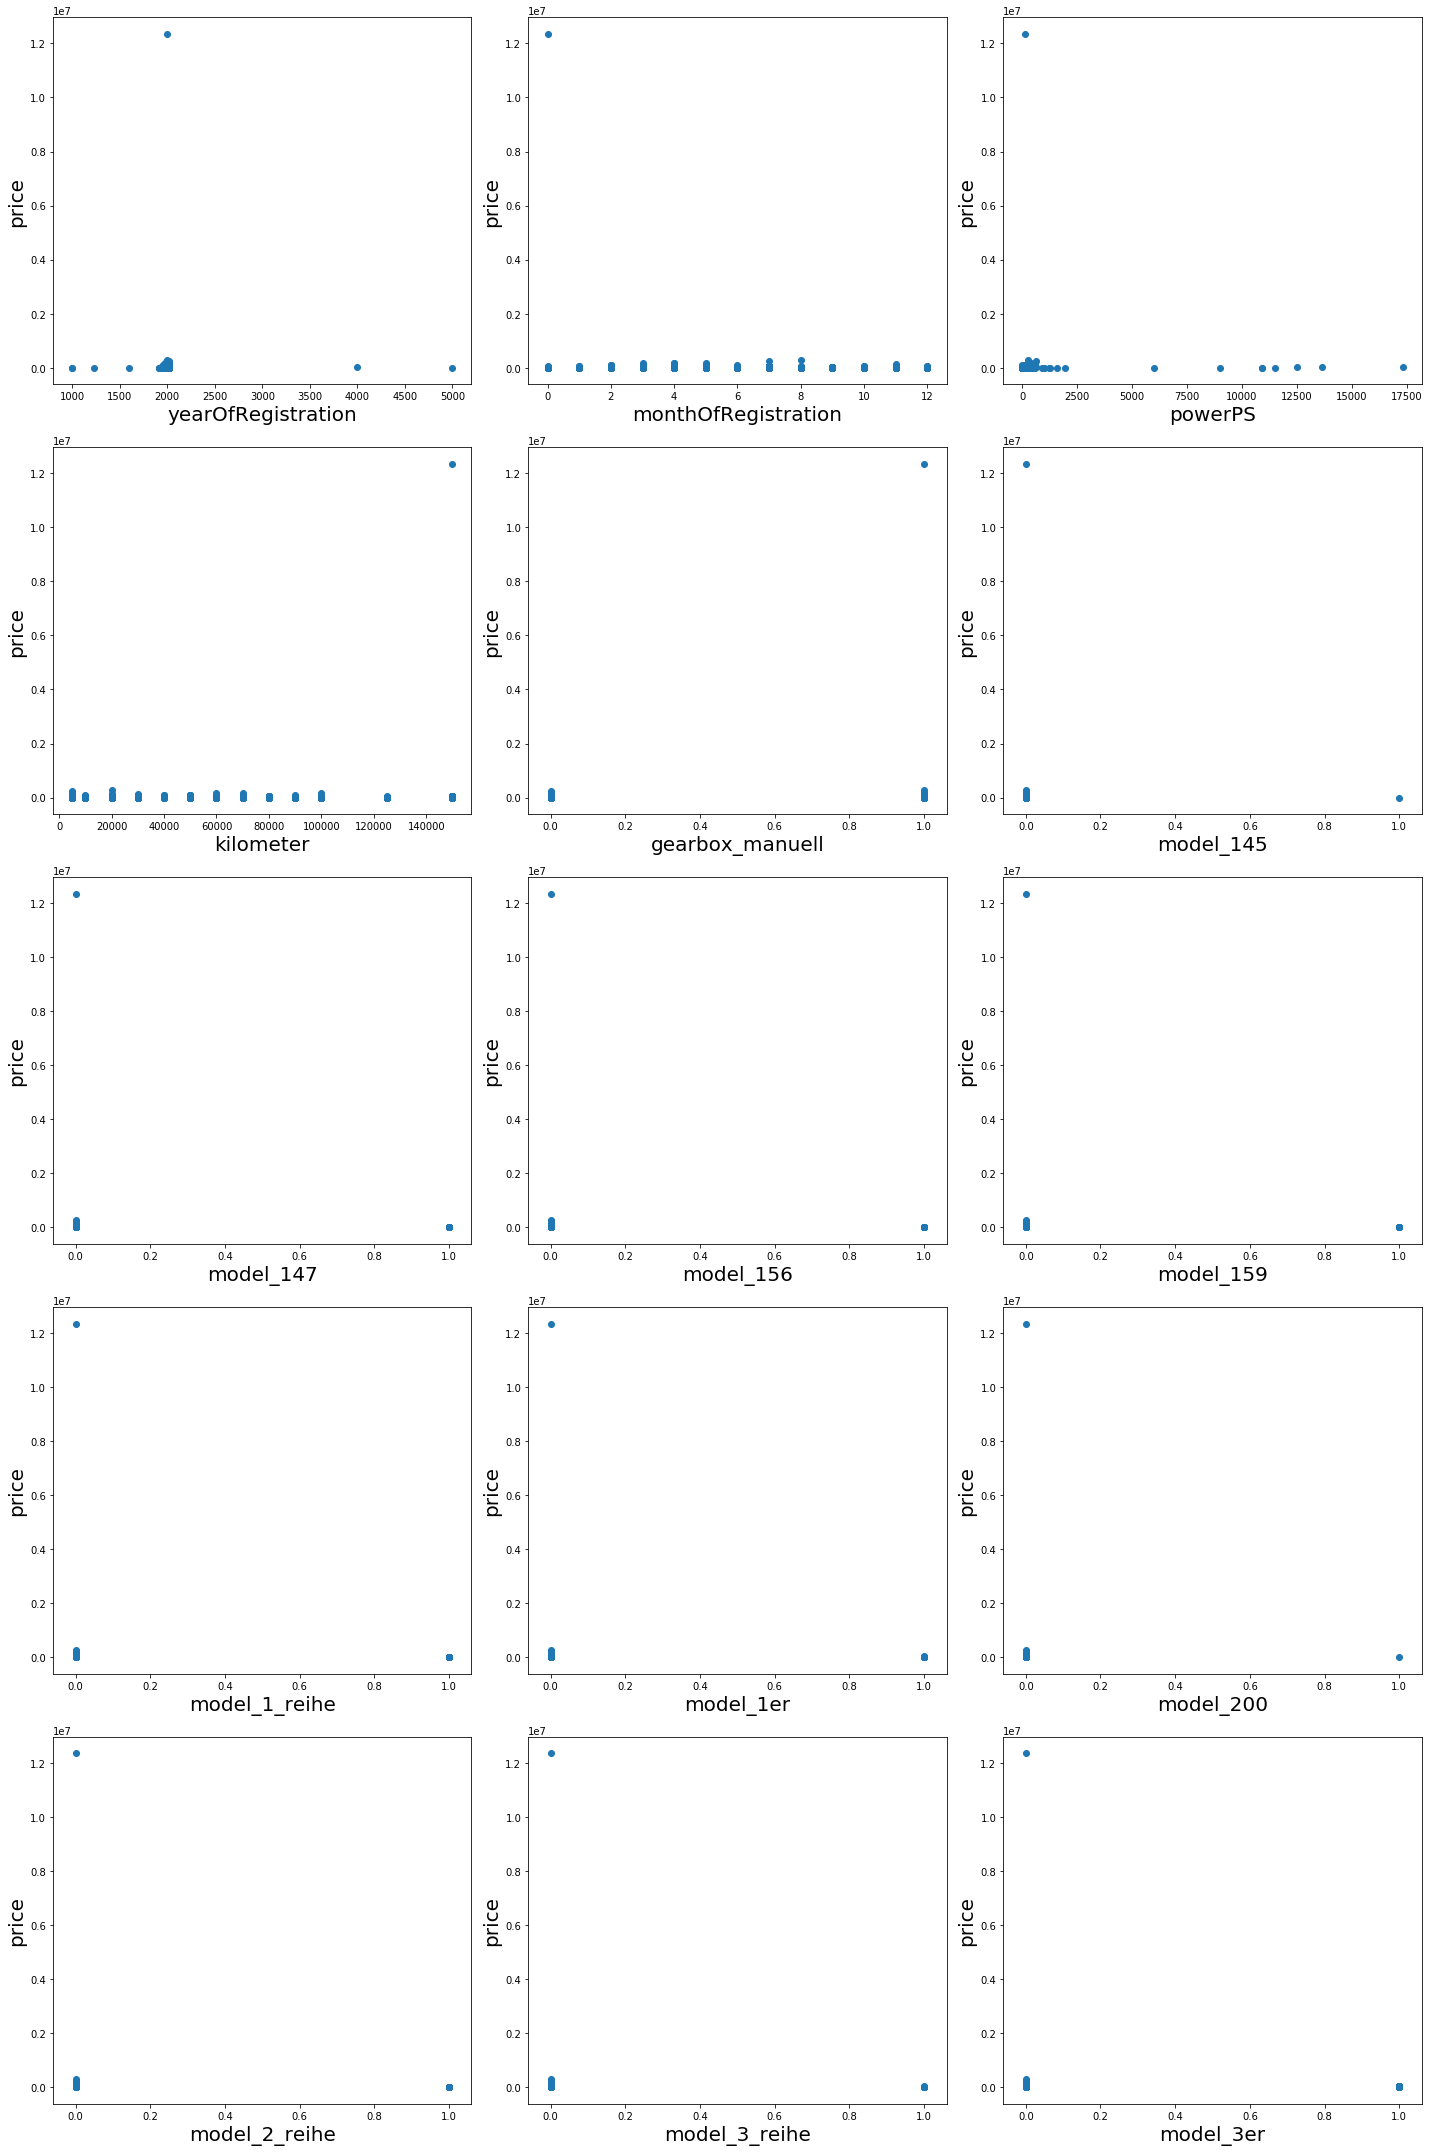

In [22]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


y = Car_data_new['price']
X =Car_data_new.drop(columns = ['price'])
scaler =StandardScaler()

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [23]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


y = Car_data_new['price']
X =Car_data_new.drop(columns = ['price'])
scaler =StandardScaler()


scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns
print(vif)

C:\Users\vishd\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


            VIF             Features
0      1.020974   yearOfRegistration
1      1.094927  monthOfRegistration
2      1.081022              powerPS
3      1.233248            kilometer
4      1.437751      gearbox_manuell
..          ...                  ...
286    5.523045         brand_suzuki
287   10.665052         brand_toyota
288    4.009133        brand_trabant
289  114.089768     brand_volkswagen
290    9.457112          brand_volvo

[291 rows x 2 columns]


In [ ]:
#brand suzuki, toyota,volkswagaen, volvo has highter value than 5 so these values shows these brands have multillinearity. 